In [1]:
import pandas as pd
import os 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
data_year = 2017
fire_df = pd.read_csv("/Users/zwy/Library/CloudStorage/Dropbox/work files/Policy impact on fire/VIIRS_{}_all.csv".format(data_year))
fire_df.head()

,Unnamed: 0,id,lon,lat,date,time,brightness,confidence
0,0,188959,120.53938,28.85115,2017/3/1,400,341.5,nominal
1,1,188960,121.81626,39.65147,2017/3/1,400,338.1,nominal
2,2,188961,117.80023,39.28128,2017/3/1,400,330.8,nominal
3,3,188962,117.61832,39.22391,2017/3/1,400,333.6,nominal
4,4,188963,116.05602,39.12785,2017/3/1,400,328.7,nominal


In [3]:
geometry = gpd.points_from_xy(fire_df.loc[:,"lon"], fire_df.loc[:,"lat"])
fire_points = gpd.GeoDataFrame(
    fire_df[["id", "date", "time", "brightness", "confidence"]], geometry=geometry
)

fire_points.head()
len(fire_points)

3933525

In [4]:
study_area = gpd.read_file("/Users/zwy/Library/CloudStorage/Dropbox/work files/Policy impact on fire/North_China.gpkg")
study_area = study_area.to_crs("EPSG:4326")
study_area.head()


,OBJECTID,CityNameC,Shape_Leng,Shape_Area,policy_on,north,geometry
0,8,安康市,1.135105e+06,2.354871e+10,0,1,"MULTIPOLYGON (((108.04944 33.71129, 108.05015 ..."
1,9,安庆市,7.645375e+05,1.533530e+10,0,1,"MULTIPOLYGON (((117.02678 31.25832, 117.02873 ..."
2,11,安阳市,8.352834e+05,7.362277e+09,1,1,"MULTIPOLYGON (((113.73128 36.35585, 113.73223 ..."
3,21,蚌埠市,5.091955e+05,5.950611e+09,0,1,"MULTIPOLYGON (((117.23845 33.50439, 117.23900 ..."
4,23,宝鸡市,9.922102e+05,1.815695e+10,0,1,"MULTIPOLYGON (((106.48442 35.02170, 106.48433 ..."


/Users/zwy/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:2233: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.clip(self, mask=mask, keep_geom_type=keep_geom_type)


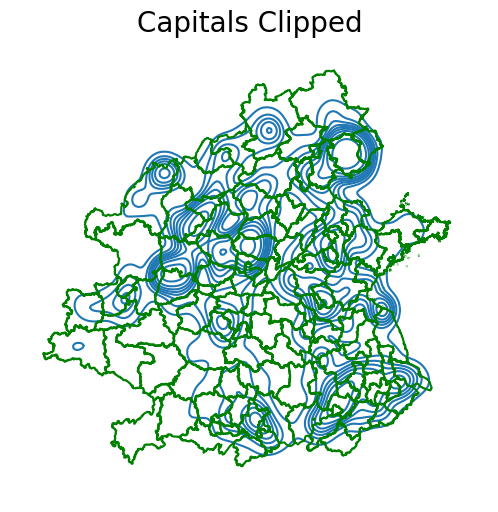

In [8]:
import geoplot
fire_clipped = fire_points.clip(study_area)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the capital cities
ax = geoplot.kdeplot(fire_clipped)
study_area.boundary.plot(ax=ax, color="green")
ax.set_title("VIIRS Fire 2017", fontsize=20)
ax.set_axis_off()
plt.show()

In [ ]:
len(fire_clipped)

473204

In [ ]:
fire_clipped.to_csv("/Users/zwy/Library/CloudStorage/Dropbox/work files/Policy impact on fire/VIIRS_{}_clipped.csv".format(data_year))